<a href="https://colab.research.google.com/github/Affanamin/ComputerVision-Projects/blob/main/ComputerVision__Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

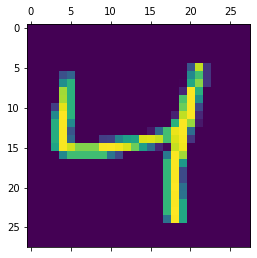

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[2]

4

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
## Build simple CNN for image classification

cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(3, 3),padding ='same' ,activation='relu',input_shape=(28, 28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3) ,padding ='same' ,activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_CNN = cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2520 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0698 - accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0526 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0423 - accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0337 - accuracy: 0.9892


In [ ]:
X_test = X_test.reshape(-1, 28, 28, 1)
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.9894


[0.03524955362081528, 0.9894000291824341]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.68048233e-13, 1.10316027e-10, 7.12849824e-09, 1.12892362e-08,
        1.06497444e-09, 2.33181946e-11, 2.16669268e-16, 9.99986172e-01,
        2.01548375e-10, 1.38035375e-05],
       [8.70633343e-08, 1.80050896e-12, 9.99999881e-01, 9.67754862e-17,
        8.47608676e-15, 1.96147519e-18, 9.49037793e-11, 2.31904634e-11,
        8.30076188e-13, 9.33658858e-13],
       [7.49796961e-11, 9.99985576e-01, 8.46984594e-10, 2.54619215e-13,
        1.50821177e-06, 9.50252876e-10, 2.64597659e-08, 1.29048776e-05,
        1.44909871e-08, 7.96462452e-10],
       [9.99999762e-01, 3.62469284e-14, 5.29754870e-14, 1.60720796e-15,
        6.54784441e-13, 5.45838513e-11, 2.39555817e-07, 2.56136112e-10,
        1.70088688e-09, 1.61469182e-09],
       [3.63495340e-13, 4.90223834e-12, 2.07200815e-12, 2.02462203e-14,
        9.99999166e-01, 2.69414404e-11, 4.59183136e-09, 1.26671756e-10,
        3.14440307e-10, 7.87004637e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
classes = ["0","1","2","3","4","5","6","7","8","9"]

In [ ]:

classes[y_classes[5]]

'1'